### Install

In [14]:
#!pip install featuretools 

In [15]:
# For conda
# conda install -c conda-forge featuretools

In [16]:
import featuretools as ft

### Toy dataset

In [17]:
data = ft.demo.load_mock_customer()

In [18]:
data.keys()

dict_keys(['customers', 'sessions', 'transactions', 'products'])

#### Entities
* customers: unique customers who had sessions
* sessions: unique sessions and associated attributes
* transactions: list of events in this session
* products: list of products invloved in the transactions 

#### Creating an EntitySet

In [19]:
es = ft.demo.load_mock_customer(return_entityset=True)

In [20]:
es

Entityset: transactions
  Entities:
    transactions [Rows: 500, Columns: 5]
    products [Rows: 5, Columns: 2]
    sessions [Rows: 35, Columns: 4]
    customers [Rows: 5, Columns: 4]
  Relationships:
    transactions.product_id -> products.product_id
    transactions.session_id -> sessions.session_id
    sessions.customer_id -> customers.customer_id

In [21]:
es["customers"].variables

[<Variable: customer_id (dtype = index)>,
 <Variable: join_date (dtype: datetime_time_index, format: None)>,
 <Variable: date_of_birth (dtype: datetime, format: None)>,
 <Variable: zip_code (dtype = zipcode)>]

#### Generating features

In [22]:
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                          target_entity="customers", #table or entity where feature will be added
                                          agg_primitives=["count"],
                                          trans_primitives=["month"],
                                       max_depth=1)

In [23]:
feature_defs

[<Feature: zip_code>,
 <Feature: COUNT(sessions)>,
 <Feature: MONTH(join_date)>,
 <Feature: MONTH(date_of_birth)>]

In [24]:
feature_matrix

,zip_code,COUNT(sessions),MONTH(join_date),MONTH(date_of_birth)
customer_id,,,,
1,60091,8,4,7
2,13244,7,4,8
3,13244,6,8,11
4,60091,8,4,8
5,60091,6,7,7


#### Creating deep features

In [25]:
#Deep features are build by stacking primitives. 
#max_depth parameter decides the number of allowed primitive stacking.
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                         target_entity="customers",
                                          agg_primitives=["mean", "sum", "mode"],
                                          trans_primitives=["month", "hour"],
                                          max_depth=2)

In [26]:
feature_defs

[<Feature: zip_code>,
 <Feature: MODE(sessions.device)>,
 <Feature: MEAN(transactions.amount)>,
 <Feature: SUM(transactions.amount)>,
 <Feature: MODE(transactions.product_id)>,
 <Feature: MONTH(join_date)>,
 <Feature: MONTH(date_of_birth)>,
 <Feature: HOUR(join_date)>,
 <Feature: HOUR(date_of_birth)>,
 <Feature: MEAN(sessions.MEAN(transactions.amount))>,
 <Feature: MEAN(sessions.SUM(transactions.amount))>,
 <Feature: SUM(sessions.MEAN(transactions.amount))>,
 <Feature: MODE(sessions.MODE(transactions.product_id))>,
 <Feature: MODE(sessions.MONTH(session_start))>,
 <Feature: MODE(sessions.HOUR(session_start))>,
 <Feature: MODE(transactions.sessions.customer_id)>,
 <Feature: MODE(transactions.sessions.device)>]

In [27]:
feature_matrix

,zip_code,MODE(sessions.device),MEAN(transactions.amount),SUM(transactions.amount),MODE(transactions.product_id),MONTH(join_date),MONTH(date_of_birth),HOUR(join_date),HOUR(date_of_birth),MEAN(sessions.MEAN(transactions.amount)),MEAN(sessions.SUM(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),MODE(sessions.MODE(transactions.product_id)),MODE(sessions.MONTH(session_start)),MODE(sessions.HOUR(session_start)),MODE(transactions.sessions.customer_id),MODE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,
1,60091,mobile,71.631905,9025.62,4,4,7,10,0,72.774140,1128.202500,582.193117,4,1,6,1,mobile
2,13244,desktop,77.422366,7200.28,4,4,8,23,0,78.415122,1028.611429,548.905851,3,1,3,2,desktop
3,13244,desktop,67.060430,6236.62,1,8,11,15,0,67.539577,1039.436667,405.237462,1,1,5,3,desktop
4,60091,mobile,80.070459,8727.68,2,4,8,20,0,81.207189,1090.960000,649.657515,1,1,1,4,mobile
5,60091,mobile,80.375443,6349.66,5,7,7,5,0,78.705187,1058.276667,472.231119,3,1,0,5,mobile


#### Creating an EntitySet from scratch

In [28]:
data = ft.demo.load_mock_customer()

In [29]:
data['products']

,product_id,brand
0,1,B
1,2,B
2,3,B
3,4,B
4,5,A


In [30]:
data["transactions"]

,transaction_id,session_id,transaction_time,product_id,amount
0,298,1,2014-01-01 00:00:00,5,127.64
1,2,1,2014-01-01 00:01:05,2,109.48
2,308,1,2014-01-01 00:02:10,3,95.06
3,116,1,2014-01-01 00:03:15,4,78.92
4,371,1,2014-01-01 00:04:20,3,31.54
...,...,...,...,...,...
495,112,35,2014-01-01 08:56:15,5,55.42
496,111,35,2014-01-01 08:57:20,3,34.87
497,276,35,2014-01-01 08:58:25,1,10.94
498,266,35,2014-01-01 08:59:30,5,19.86


In [31]:
data["sessions"]

,session_id,customer_id,device,session_start
0,1,2,desktop,2014-01-01 00:00:00
1,2,5,mobile,2014-01-01 00:17:20
2,3,4,mobile,2014-01-01 00:28:10
3,4,1,mobile,2014-01-01 00:44:25
4,5,4,mobile,2014-01-01 01:11:30
5,6,1,tablet,2014-01-01 01:23:25
6,7,3,tablet,2014-01-01 01:39:40
7,8,4,tablet,2014-01-01 01:55:55
8,9,1,desktop,2014-01-01 02:15:25
9,10,2,tablet,2014-01-01 02:31:40


In [32]:
data["customers"]

,customer_id,zip_code,join_date,date_of_birth
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


In [33]:
transactions_df = data["transactions"].merge(data["sessions"]).merge(data["customers"])

In [34]:
transactions_df.head()

,transaction_id,session_id,transaction_time,product_id,amount,customer_id,device,session_start,zip_code,join_date,date_of_birth
0,298,1,2014-01-01 00:00:00,5,127.64,2,desktop,2014-01-01,13244,2012-04-15 23:31:04,1986-08-18
1,2,1,2014-01-01 00:01:05,2,109.48,2,desktop,2014-01-01,13244,2012-04-15 23:31:04,1986-08-18
2,308,1,2014-01-01 00:02:10,3,95.06,2,desktop,2014-01-01,13244,2012-04-15 23:31:04,1986-08-18
3,116,1,2014-01-01 00:03:15,4,78.92,2,desktop,2014-01-01,13244,2012-04-15 23:31:04,1986-08-18
4,371,1,2014-01-01 00:04:20,3,31.54,2,desktop,2014-01-01,13244,2012-04-15 23:31:04,1986-08-18


In [35]:
products_df = data["products"]

In [36]:
products_df

,product_id,brand
0,1,B
1,2,B
2,3,B
3,4,B
4,5,A


In [37]:
#STEP 1. Initialize an EntitySet 
es = ft.EntitySet(id="customer_data")

In [38]:
#STEP 2. Add entitites
es = es.entity_from_dataframe(entity_id="transactions",
                                  dataframe=transactions_df,
                                  index="transaction_id",
                                  time_index="transaction_time", #when the data in each row became known.
                                  variable_types={"product_id": ft.variable_types.Categorical,
                                                 "zip_code": ft.variable_types.ZIPCode})

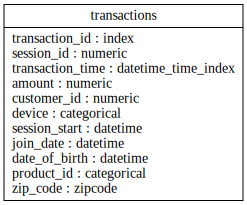

In [39]:
es.plot()

In [40]:
# Add Products
es = es.entity_from_dataframe(entity_id="products",
                                  dataframe=products_df,
                                index="product_id")

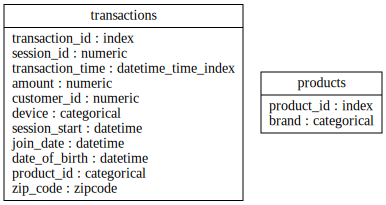

In [41]:
es.plot()

#### Adding a relationship

In [42]:
# STEP 3 - Add relationship
#Parent comes first and child comes ater
new_relationship = ft.Relationship(es["products"]["product_id"],
                                    es["transactions"]["product_id"])

In [43]:
es = es.add_relationship(new_relationship)

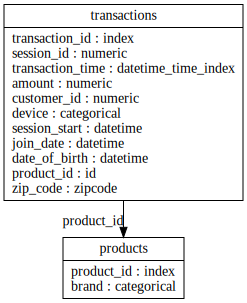

In [44]:
es.plot()

In [186]:
#Time to build the feature matrix
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                       target_entity="products")

In [187]:
feature_defs

[<Feature: brand>,
 <Feature: SUM(transactions.session_id)>,
 <Feature: SUM(transactions.amount)>,
 <Feature: SUM(transactions.customer_id)>,
 <Feature: STD(transactions.session_id)>,
 <Feature: STD(transactions.amount)>,
 <Feature: STD(transactions.customer_id)>,
 <Feature: MAX(transactions.session_id)>,
 <Feature: MAX(transactions.amount)>,
 <Feature: MAX(transactions.customer_id)>,
 <Feature: SKEW(transactions.session_id)>,
 <Feature: SKEW(transactions.amount)>,
 <Feature: SKEW(transactions.customer_id)>,
 <Feature: MIN(transactions.session_id)>,
 <Feature: MIN(transactions.amount)>,
 <Feature: MIN(transactions.customer_id)>,
 <Feature: MEAN(transactions.session_id)>,
 <Feature: MEAN(transactions.amount)>,
 <Feature: MEAN(transactions.customer_id)>,
 <Feature: COUNT(transactions)>,
 <Feature: NUM_UNIQUE(transactions.device)>,
 <Feature: NUM_UNIQUE(transactions.zip_code)>,
 <Feature: MODE(transactions.device)>,
 <Feature: MODE(transactions.zip_code)>,
 <Feature: NUM_UNIQUE(transactio

In [188]:
feature_matrix

,brand,SUM(transactions.session_id),SUM(transactions.amount),SUM(transactions.customer_id),STD(transactions.session_id),STD(transactions.amount),STD(transactions.customer_id),MAX(transactions.session_id),MAX(transactions.amount),MAX(transactions.customer_id),...,MODE(transactions.YEAR(join_date)),MODE(transactions.YEAR(date_of_birth)),MODE(transactions.MONTH(transaction_time)),MODE(transactions.MONTH(session_start)),MODE(transactions.MONTH(join_date)),MODE(transactions.MONTH(date_of_birth)),MODE(transactions.WEEKDAY(transaction_time)),MODE(transactions.WEEKDAY(session_start)),MODE(transactions.WEEKDAY(join_date)),MODE(transactions.WEEKDAY(date_of_birth))
product_id,,,,,,,,,,,,,,,,,,,,,
1,B,1809,7489.79,298,10.640783,42.479989,1.404986,35,149.56,5,...,2011,1994,1,1,4,7,2,2,5,0
2,B,1571,7021.43,271,9.391642,46.336308,1.424774,34,149.95,5,...,2011,2006,1,1,4,8,2,2,6,0
3,B,1832,7008.12,291,10.703336,38.871405,1.341273,35,148.31,5,...,2011,2006,1,1,4,8,2,2,5,0
4,B,1894,8088.97,273,9.942765,42.492501,1.440556,35,146.46,5,...,2011,1994,1,1,4,7,2,2,6,0
5,A,1914,7931.55,289,11.129005,42.131902,1.474421,35,149.02,5,...,2011,1994,1,1,4,7,2,2,6,0


Check the documentation for further details https://docs.featuretools.com/